## Importing Libraries

In this step, we import the necessary libraries for data manipulation (`pandas`) and visualization (`plotly.graph_objs` and `plotly.express`). These will help us create interactive bar and line charts for our dashboard.


In [1]:
# Import necessary libraries
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px


## Load Dataset

We load the cleaned and merged dataset containing both CitiBike trip data and weather data (temperature) for analysis. This dataset was prepared in the previous tasks.


In [2]:
# Load the cleaned CitiBike + weather merged dataset
df = pd.read_csv('citibike_weather_merged_2022.csv')

# Display the first few rows
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp_f_tenths,avg_temp_f
0,AD280D4AE55D3506,electric_bike,2022-06-17 17:32:55.309,2022-06-17 17:45:46.076,E 47 St & 2 Ave,6498.10,E 2 St & Avenue C,5476.03,40.753231,-73.970325,40.720874,-73.980858,member,2022-06-17,252,77.4
1,734318BA808A46DC,electric_bike,2022-09-20 17:04:00.975,2022-09-20 17:18:40.884,Monroe St & Bedford Ave,4368.05,Wythe Ave & Metropolitan Ave,5348.02,40.685129,-73.953813,40.716887,-73.963198,member,2022-09-20,232,73.8
2,DE53B4E2A0F3A27A,classic_bike,2022-10-20 19:05:14.263,2022-10-20 19:12:11.338,8 Ave & W 38 St,6526.05,W 35 St & Dyer Ave,6569.08,40.754610,-73.991770,40.754692,-73.997402,member,2022-10-20,111,52.0
3,E39D5C4183A3403C,electric_bike,2022-02-03 17:04:12.668,2022-02-03 17:13:41.827,E 84 St & Park Ave,7243.04,Columbus Ave & W 95 St,7520.07,40.778627,-73.957721,40.791956,-73.968087,member,2022-02-03,64,43.5
4,4C7D7975092F14F7,electric_bike,2022-03-15 12:47:17.204,2022-03-15 12:54:00.503,Greenwich St & Hubert St,5470.10,Centre St & Chambers St,5207.01,40.721319,-74.010065,40.712733,-74.004607,member,2022-03-15,116,52.9


### Bar Chart: Top 20 Most Popular Start Stations

The chart displays the top 20 most frequently used start stations in the CitiBike 2022 dataset. The use of a blue color scale adds visual clarity, highlighting the busiest stations more vividly. This visualization offers valuable insights for optimizing station placements and understanding ridership patterns in New York City.



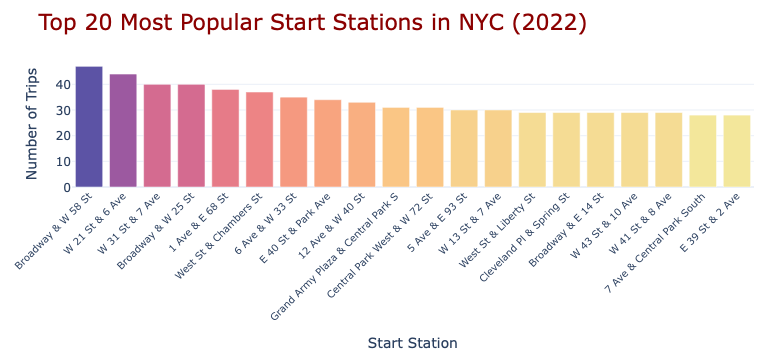

In [3]:
import plotly.graph_objects as go
import pandas as pd

# Group and sort the data
start_station_counts = df['start_station_name'].value_counts().head(20).reset_index()
start_station_counts.columns = ['start_station_name', 'trip_count']

# Create the bar chart
fig = go.Figure(
    go.Bar(
        x=start_station_counts['start_station_name'],
        y=start_station_counts['trip_count'],
        marker=dict(
            color=start_station_counts['trip_count'],
            colorscale='Sunset',  # Try 'Sunsetdark' or 'Earth' too
            showscale=False
        )
    )
)

# Update layout for better appearance
fig.update_layout(
    title='Top 20 Most Popular Start Stations in NYC (2022)',
    title_font=dict(size=22, color='darkred'),
    xaxis_title='Start Station',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    xaxis_tickfont=dict(size=10),
    yaxis_tickfont=dict(size=12),
    template='plotly_white',
    margin=dict(l=60, r=20, t=60, b=100)
)

fig.show()


### Line Chart: Daily Bike Rides vs. Temperature in NYC (2022)

This dual-axis line chart visualizes the relationship between the number of CitiBike rides and the average daily temperature in New York City during 2022.

- The **left y-axis** (in orange) represents the **daily count of bike rides**.
- The **right y-axis** (in golden yellow, dashed line) represents the **average temperature (°F)**.

The purpose of this chart is to observe how temperature fluctuations may impact biking behavior. A strong seasonal trend is noticeable—higher temperatures tend to correlate with an increase in daily bike rides.

The design uses warm, earthy tones inspired by sunrise and sunset colors to enhance readability and aesthetic appeal. This helps clearly distinguish the two variables while maintaining a cohesive and professional look.


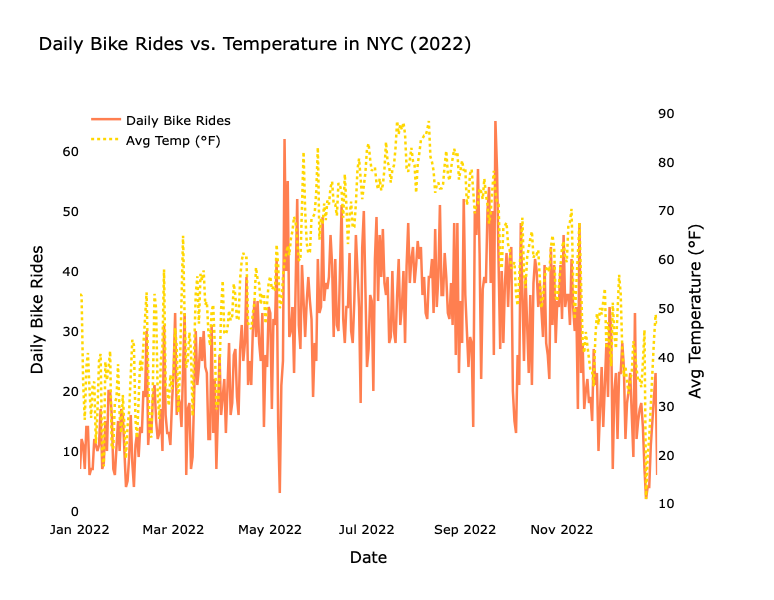

In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Group data by date to count rides
daily_data = df.groupby('date').size().reset_index(name='daily_bike_rides')
daily_data['date'] = pd.to_datetime(daily_data['date'])

# Calculate daily average temperature
avg_temp = df.groupby('date')['avg_temp_f'].mean().reset_index()

# Create dual-axis chart
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# Add daily bike rides line (left y-axis)
fig2.add_trace(
    go.Scatter(
        x=daily_data['date'],
        y=daily_data['daily_bike_rides'],
        mode='lines',
        name='Daily Bike Rides',
        line=dict(color='#FF7F50', width=2.5),  # coral/orange
    ),
    secondary_y=False
)

# Add average temperature line (right y-axis)
fig2.add_trace(
    go.Scatter(
        x=avg_temp['date'],
        y=avg_temp['avg_temp_f'],
        mode='lines',
        name='Avg Temp (°F)',
        line=dict(color='#FFD700', width=2.5, dash='dot'),  # golden yellow
    ),
    secondary_y=True
)

# Layout customization with soft white background
fig2.update_layout(
    title='Daily Bike Rides vs. Temperature in NYC (2022)',
    xaxis_title='Date',
    plot_bgcolor='rgba(255,255,255,1)',
    paper_bgcolor='rgba(255,255,255,1)',
    font=dict(size=13, color='black'),
    legend=dict(x=0.01, y=0.99),
    height=600
)

# Set y-axis titles
fig2.update_yaxes(title_text='Daily Bike Rides', secondary_y=False)
fig2.update_yaxes(title_text='Avg Temperature (°F)', secondary_y=True)

fig2.show()


## 📊 Average Ride Duration by Rider Type (Minutes)
This horizontal bar chart compares the average trip duration between Casual and Member riders using distinct colors that match our dashboard’s overall theme. Casual riders had a significantly longer average ride time compared to member riders.
Design choices:

🎨 Color scheme matches the theme used across our visualizations:
Casual riders are shown in gold/yellow (#FFD700)
Member riders are shown in warm orange (#FF7F0E)
🧱 Horizontal layout improves readability for categorical comparison.
🧼 White background and black font/gridlines ensure accessibility and professional visual contrast.
🪄 Added axis lines and tick labels for clarity and presentation consistency.
This visual helps highlight behavioral differences between user types, which can inform business decisions like targeted promotions or subscription offerings.

In [5]:
df.columns


Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f'],
      dtype='object')

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Step 1: Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Step 2: Create a new column for trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Step 3: Group by rider type and calculate average duration
avg_duration = df.groupby('member_casual')['trip_duration_min'].mean().reset_index()

# Step 4: Set order and extract values
ride_types = ['Casual', 'Member']
durations = [
    avg_duration.loc[avg_duration['member_casual'] == 'casual', 'trip_duration_min'].values[0],
    avg_duration.loc[avg_duration['member_casual'] == 'member', 'trip_duration_min'].values[0]
]

# Step 5: Create the horizontal bar chart
fig3 = go.Figure(go.Bar(
    x=durations,
    y=ride_types,
    orientation='h',
    marker=dict(
        color=['gold', 'darkorange'],
        line=dict(color='black', width=1.5)
    )
))

fig3.update_layout(
    title='Average Ride Duration by Rider Type (Minutes)',
    xaxis=dict(
        title='Average Duration (min)',
        showline=True,
        linecolor='black',
        tickcolor='black',
        tickfont=dict(color='black'),
        title_font=dict(color='black')
    ),
    yaxis=dict(
        showline=True,
        showgrid=False,
        linecolor='black',
        tickcolor='black',
        tickfont=dict(color='black'),
        title_font=dict(color='black'),
        tickmode='array',
        tickvals=[0, 1],
        ticktext=ride_types
    )
)

# Display the chart
fig3.show()


In [7]:
# Group and count rides by rider type
ride_counts = df['member_casual'].value_counts().reset_index()
ride_counts.columns = ['rider_type', 'count']


In [8]:
import pandas as pd
import plotly.express as px

# 1) Recreate the counts from scratch (robust to state/order)
ride_counts = (
    df['member_casual']                       # column exists in your df
      .value_counts(dropna=False)             # count all values
      .rename_axis('rider_type')              # make the index a column name
      .reset_index(name='count')              # -> DataFrame with ['rider_type','count']
)

# 2) Sanity checks (these prevent the “acting funny” surprises)
print(ride_counts.columns.tolist())
print(ride_counts.head())

assert {'rider_type','count'} <= set(ride_counts.columns), "Columns not as expected"
assert ride_counts.shape[0] > 0, "No rows in ride_counts"

# 3) Plot
fig4 = px.bar(
    ride_counts,
    x='rider_type',
    y='count',
    color='rider_type',
    title='Total Number of Rides by Rider Type',
    labels={'rider_type': 'Rider Type', 'count': 'Number of Rides'},
    color_discrete_map={'member': 'orange', 'casual': 'gold'}  # exact lowercase keys
)

fig4.update_layout(
    showlegend=False,
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis=dict(title='Count', title_font=dict(color='black'), tickfont=dict(color='black')),
    title_font=dict(color='black')
)
fig4.show()


['rider_type', 'count']
  rider_type  count
0     member   7847
1     casual   2153


### Total Number of Rides by Rider Type

This bar chart visualizes the total number of bike rides taken by different rider types — **members** and **casual** riders — using the CitiBike dataset.  

**Steps Taken:**
1. **Data Preparation:**
   - Grouped the dataset by the `member_casual` column to separate rides by rider type.
   - Counted the number of rides for each type using `.value_counts()` and reset the index for a clean DataFrame.
   - Renamed the columns to `rider_type` and `count` for clarity.

2. **Visualization:**
   - Created a **bar chart** using Plotly Express (`px.bar`) with:
     - **X-axis:** Rider type (`member` vs `casual`)
     - **Y-axis:** Total ride count.
     - Custom **color mapping**:
       - Members: **Orange**
       - Casual riders: **Gold**
   - Updated the chart layout to:
     - Hide the legend (`showlegend=False`) since the color mapping is self-explanatory.
     - Apply black font for axis titles and tick labels for better readability.

3. **Insights:**
   - The chart highlights the disparity in ride counts between the two rider types.
   - Typically, **members** have a higher ride count compared to casual riders, suggesting consistent usage patterns from subscribers.

This visualization helps identify the distribution of rides across user categories, which is valuable for understanding user engagement and for designing targeted marketing or retention strategies.


In [9]:
df['day_of_week'] = pd.to_datetime(df['started_at']).dt.day_name()


In [10]:
weekday_counts = df.groupby(['day_of_week', 'member_casual']).size().reset_index(name='ride_count')


In [11]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts['day_of_week'] = pd.Categorical(weekday_counts['day_of_week'], categories=days_order, ordered=True)
weekday_counts = weekday_counts.sort_values('day_of_week')


In [12]:
fig5 = px.bar(
    weekday_counts,
    x='day_of_week',
    y='ride_count',
    color='member_casual',  # Column name
    barmode='group',
    title='Ride Counts by Day of Week and Rider Type',
    labels={
        'member_casual': 'Rider Type',
        'ride_count': 'Number of Rides',
        'day_of_week': 'Day of the Week'
    },
    color_discrete_map={
        'member': 'orange',
        'casual': 'gold'
    }
)

fig5.update_layout(
    xaxis=dict(
        title='Day of the Week',
        title_font=dict(color='black'),
        tickfont=dict(color='black')
    ),
    yaxis=dict(
        title='Number of Rides',
        title_font=dict(color='black'),
        tickfont=dict(color='black')
    ),
    title_font=dict(color='black'),
    legend_title_font=dict(color='black'),
    legend_font=dict(color='black'),
    plot_bgcolor='white'
)

fig5.show()


### Ride Counts by Day of Week and Rider Type

This grouped bar chart shows the **number of rides** taken by casual riders and members for each day of the week.

**Key Observations:**
- **Members consistently account for the majority of rides** throughout the week.
- Weekdays (Tuesday to Thursday) show relatively stable ride counts for members, suggesting regular commuting patterns.
- Casual rider activity increases slightly on **weekends**, indicating more leisure or recreational trips.
- Saturday and Sunday have lower total ride counts compared to midweek, but casual riders make up a larger share during these days.

**Insights:**
- Membership retention campaigns may focus on weekday commuting benefits.
- Weekend promotions or events could attract more casual riders and potentially convert them into members.


In [13]:
# Convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a new 'month' column
df['month'] = df['date'].dt.to_period('M').astype(str)


In [14]:
monthly_trips = df.groupby(['month', 'member_casual']).size().reset_index(name='ride_count')


In [15]:
fig6 = px.line(
    monthly_trips,
    x='month',
    y='ride_count',
    color='member_casual',
    title='Monthly Ride Trends by Rider Type',
    labels={'month': 'Month', 'ride_count': 'Number of Rides', 'member_casual': 'Rider Type'},
    color_discrete_map={'member': 'orange', 'casual': 'gold'}
)

fig6.update_layout(
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    title_font=dict(color='black'),
    legend_font=dict(color='black'),
    plot_bgcolor='white'
)

fig6.show()


### Monthly Ride Trends by Rider Type

This line chart illustrates the monthly ride counts for both casual riders and members throughout 2022.

**Key Observations:**
- **Members consistently record more rides than casual riders** in every month of the year.
- Both groups show a **steady increase in rides from January to mid-summer** (peaking around August/September), likely driven by warmer weather and longer daylight hours.
- After September, rides decline sharply for both groups, possibly due to colder temperatures and seasonal changes.
- The gap between members and casual riders remains consistent, suggesting stable loyalty among members.

**Insights:**
- Seasonal trends highlight the importance of summer-focused marketing and service optimization.
- Winter months may benefit from targeted promotions or indoor cycling partnerships to maintain ridership.


In [16]:
# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Calculate trip duration in minutes
df['trip_duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


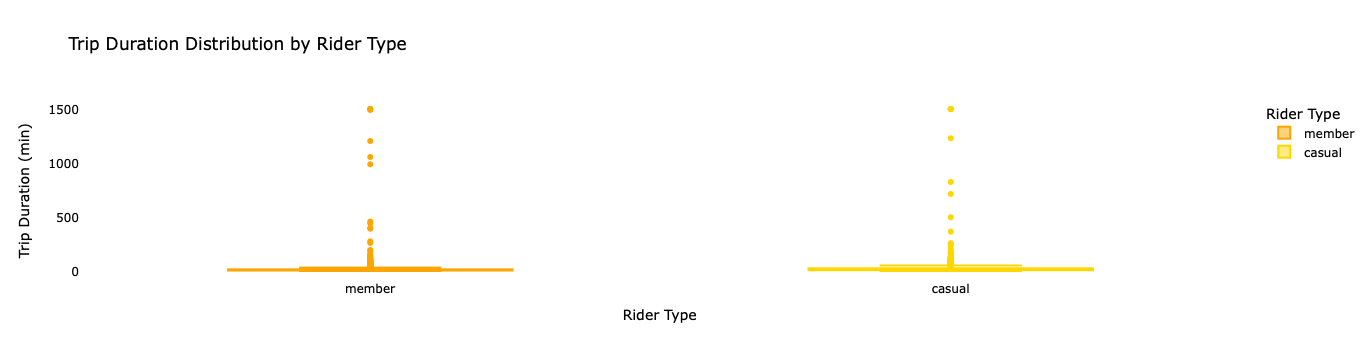

In [17]:
fig7 = px.box(
    df,
    x='member_casual',
    y='trip_duration_min',
    color='member_casual',
    title='Trip Duration Distribution by Rider Type',
    labels={
        'member_casual': 'Rider Type',
        'trip_duration_min': 'Trip Duration (min)'
    },
    color_discrete_map={'member': 'orange', 'casual': 'gold'}
)

fig7.update_layout(
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    title_font=dict(color='black'),
    legend_font=dict(color='black'),
    plot_bgcolor='white'
)

fig7.show()


In [23]:
import pandas as pd
import plotly.express as px

# Step 1: Convert start/end time columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Step 2: Create trip_duration column in minutes
df['trip_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Step 3: Extract day of the week
df['day_of_week'] = df['started_at'].dt.day_name()

# Step 4: Group by day and rider type, calculate average trip duration
avg_duration_day = df.groupby(['day_of_week', 'member_casual'])['trip_duration'].mean().reset_index()

# Step 5: Reorder the days
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_duration_day['day_of_week'] = pd.Categorical(avg_duration_day['day_of_week'], categories=days_order, ordered=True)
avg_duration_day = avg_duration_day.sort_values('day_of_week')

# Step 6: Plot with gold/orange theme
CUSTOM_COLORS = {

    'casual': 'gold',
    'member': 'orange'
}

fig6 = px.bar(
    avg_duration_day,
    x='day_of_week',
    y='trip_duration',
    color='member_casual',
    title='Average Trip Duration by Day and Rider Type',
    labels={
        'day_of_week': 'Day of the Week',
        'trip_duration': 'Average Duration (min)',
        'member_casual': 'Rider Type'
    },
    color_discrete_map=CUSTOM_COLORS
)

# Step 7: Styling
fig6.update_layout(
    xaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    yaxis=dict(title_font=dict(color='black'), tickfont=dict(color='black')),
    title_font=dict(color='black'),
    legend_title_font=dict(color='black'),
    legend_font=dict(color='black'),
    plot_bgcolor='white'
)

fig6.show()


KeyError: 'started_at'

### Average Trip Duration by Day and Rider Type

This stacked bar chart displays the **average trip duration (in minutes)** for both casual riders and members, grouped by each day of the week.  

**Key Observations:**
- **Saturday** shows the highest average trip duration for both rider types, suggesting increased leisure riding on weekends.
- **Monday** also has relatively longer trip durations compared to midweek days, potentially due to start-of-week commutes or leisure rides.
- **Tuesday to Friday** display shorter average trip durations, likely reflecting work commutes or shorter weekday trips.
- Casual riders generally have **longer trips** compared to members across all days.

**Insights:**
- Weekend marketing campaigns could be targeted toward casual riders who tend to ride longer on Saturdays.
- Member engagement could be improved by promoting longer scenic rides during weekdays.


In [20]:
import pandas as pd
import numpy as np

# Peek at what you actually have
print(df.columns.tolist())

# ---- 1) Rename common variants to the names we need ----
rename_map = {}

# date
for c in ["date","Date","ride_date","started_at","start_time","starttime"]:
    if c in df.columns: 
        rename_map[c] = "date"; break

# temperature -> avgTemp (°F)
for c in ["avgTemp","avgTemp_f","avg_temp_f","temperature_f","tavg_f","tavg","avg_temp","temp_f"]:
    if c in df.columns:
        rename_map[c] = "avgTemp"; break

# start station
for c in ["start_station_name","Start Station Name","start_station","from_station_name"]:
    if c in df.columns:
        rename_map[c] = "start_station_name"; break

df = df.rename(columns=rename_map).copy()

# Ensure datetime
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# ---- 2) Create 'bike_rides_daily' if missing (from trip-level) ----
if "bike_rides_daily" not in df.columns:
    # If rows are trips and you have a timestamp per row, aggregate per day:
    if "date" in df.columns and df["date"].notna().any():
        daily_counts = df.groupby(df["date"].dt.date).size().reset_index(name="bike_rides_daily")
        daily_counts["date"] = pd.to_datetime(daily_counts["date"])
        # keep a slim daily table for the dashboard
        slim = daily_counts.copy()
        # try to carry a representative start_station_name if present (optional)
        if "start_station_name" in df.columns:
            tmp = (df.dropna(subset=["date","start_station_name"])
                     .assign(day=df["date"].dt.date)
                     .groupby(["day","start_station_name"]).size()
                     .reset_index(name="rides")
                     .sort_values(["day","rides"], ascending=[True,False])
                     .drop_duplicates(["day"])[["day","start_station_name"]]
                   )
            tmp.rename(columns={"day":"date"}, inplace=True)
            tmp["date"] = pd.to_datetime(tmp["date"])
            slim = slim.merge(tmp, on="date", how="left")
        # attach temperature if present
        if "avgTemp" in df.columns:
            daily_temp = (df[["date","avgTemp"]]
                          .dropna()
                          .groupby(df["date"].dt.date)["avgTemp"]
                          .mean().reset_index())
            daily_temp["date"] = pd.to_datetime(daily_temp["date"])
            slim = slim.merge(daily_temp, on="date", how="left")
        df = slim  # switch df to daily level

# ---- 3) Create 'season' if missing ----
if "season" not in df.columns:
    if "date" not in df.columns:
        raise ValueError("No 'date' column to derive 'season' from.")
    m = df["date"].dt.month
    season_map = {12:"Winter",1:"Winter",2:"Winter",3:"Spring",4:"Spring",5:"Spring",
                  6:"Summer",7:"Summer",8:"Summer",9:"Fall",10:"Fall",11:"Fall"}
    df["season"] = m.map(season_map)

# Final sanity check
need = ["date","bike_rides_daily","avgTemp","start_station_name","season"]
missing = [c for c in need if c not in df.columns]
print("Missing after fixes:", missing)
df.head()


['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'date', 'avg_temp_f_tenths', 'avg_temp_f', 'trip_duration_min', 'day_of_week', 'month', 'trip_duration']
Missing after fixes: []


,date,bike_rides_daily,start_station_name,avgTemp,season
0,2022-01-01,7,5 Ave & E 63 St,52.9,Winter
1,2022-01-02,12,11 Ave & W 59 St,52.5,Winter
2,2022-01-03,11,11 Ave & W 41 St,34.5,Winter
3,2022-01-04,7,E 20 St & 2 Ave,27.1,Winter
4,2022-01-05,14,2 Ave & E 31 St,37.8,Winter


In [21]:
np.random.seed(32)

use_cols = ["date","bike_rides_daily","avgTemp","start_station_name","season"]
df_small = df[use_cols].copy()

mask = np.random.rand(len(df_small)) <= 0.08    # ~8%
sample_df = df_small[mask].reset_index(drop=True)

sample_df.to_csv("reduced_data_to_plot_7.csv", index=False)
sample_df.shape


(26, 5)

In [22]:
import os, pandas as pd
print(os.path.abspath("reduced_data_to_plot_7.csv"))
pd.read_csv("reduced_data_to_plot_7.csv").head()


/Users/muhammaddildar/Desktop/citibike_2022_dashboard/reduced_data_to_plot_7.csv


,date,bike_rides_daily,avgTemp,start_station_name,season
0,2022-01-18,10,35.2,Amsterdam Ave & W 119 St,Winter
1,2022-02-01,9,28.9,Central Park North & Adam Clayton Powell Blvd,Winter
2,2022-02-05,11,27.0,21 St & 43 Ave,Winter
3,2022-02-20,13,27.3,5 Ave & E 135 St,Winter
4,2022-02-24,16,34.0,1 Ave & E 18 St,Winter
